In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('houses.csv')
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


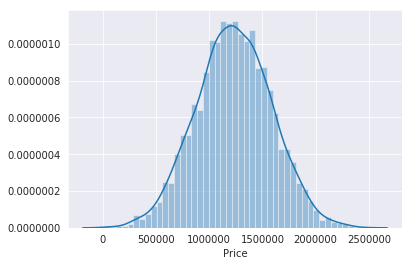

In [10]:
sns.distplot(data['Price']);

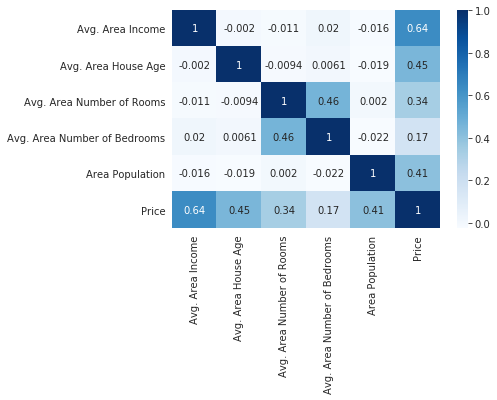

In [15]:
sns.heatmap(data.corr(), cmap='Blues', annot=True);

In [18]:
1401812*6

8410872

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [36]:
x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = data[['Price']]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [47]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Validemos el modelo

In [41]:
from sklearn import metrics

In [48]:
predicciones = modelo_lineal.predict(x_test)

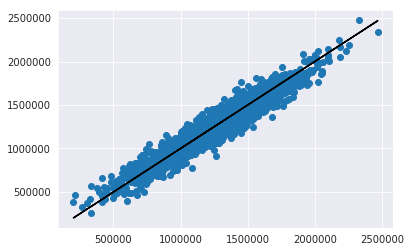

In [45]:
plt.scatter(y_test, predicciones)
plt.plot(y_test, y_test, 'k')

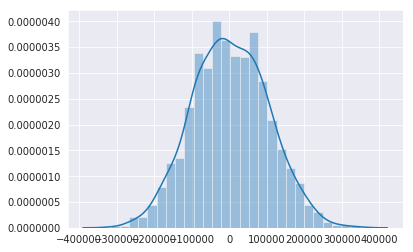

In [46]:
sns.distplot(y_test - predicciones)

Como la distribución del error, o las diferencias es normal esto indica que el modelo escogido es el correcto. (linear)

In [49]:
# MAE Mean Absolute Error
metrics.mean_absolute_error(y_test, predicciones)

81135.5660933688

Si usamos otro modelo, podemos compararlos con este número, donde el mejor modelo tiene valor menor.

In [51]:
# MSE Mean Square Error
metrics.mean_squared_error(y_test, predicciones)

10068422551.401012

In [52]:
# RMSE Root Mean Square Error
np.sqrt(metrics.mean_squared_error(y_test, predicciones))

100341.52954485502